I would like to figure out when rent prices are the lowest in the area where I am trying to move (Cobb county and surrounding areas).

In [175]:
import pandas as pd
zillow_data = pd.read_csv('zillow_rentals.csv')
print(zillow_data.columns)

Index(['RegionName', 'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS',
       'SizeRank', '2010-01', '2010-02', '2010-03', '2010-04',
       ...
       '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
       '2018-12', '2019-01', '2019-02', '2019-03'],
      dtype='object', length=117)


I am only interested in rent prices in the Cobb and Fulton counties of Georgia.

In [177]:
zillow_data = zillow_data[zillow_data['State'] == 'GA']
regions = ['Fulton County', 'Cobb County']
index_to_drop = []

practice = zillow_data.head()
for i, row in zillow_data.iterrows():
    if row['RegionName'] not in regions:
        index_to_drop.append(i)

zillow_data = zillow_data.drop(index_to_drop, axis=0)
zillow_data

,RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
45,Fulton County,GA,Atlanta-Sandy Springs-Roswell,13,121,46,NaN,1150.0,1200.0,1197.5,...,1705.0,1775.0,1804.0,1773.0,1975.0,1960.0,1980.0,2000.0,2019.0,1989.5
83,Cobb County,GA,Atlanta-Sandy Springs-Roswell,13,67,84,NaN,NaN,850.0,850.0,...,1358.0,1315.0,1330.0,1316.0,1329.5,1317.5,1319.5,1318.0,1320.0,1340.5


Because I now have only 2 rows and 117 columns, the data will be easier to work with if I transpose it.  Also, I don't need any information aside from rent at each date, so I will remove everything from RegionName through SizeRank.  I also need to extract the month and year from the row indeces to be able to group by month later.

In [178]:
z_t = zillow_data.transpose()
z_t = z_t.iloc[8:len(z_t)]
z_t['Year'] = ""
z_t['Month'] = ""

for i, row in z_t.iterrows():
    row['Year'] = i[0:4]
    row['Month'] = i[5:7]

z_t.head()

,45,83,Year,Month
2010-03,1200,850,2010,03
2010-04,1197.5,850,2010,04
2010-05,1200,875,2010,05
2010-06,1200,875,2010,06
2010-07,1200,895,2010,07


In [122]:
import numpy as np

grouped = z_t.groupby(['Month'])

Normally I would just use aggregate functions and create a pivot table, but for some reason I am getting an error related to data type even though I have tried many different ways of doing this and can do it successfully "the long way".  I came up with a workaround that iterates through the dataframe and uses loops to calculate the averages for each group.

In [179]:
index = []
for i in range(0,12):
    index.append(i)
    
months_str = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_num = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
col = ['Cobb', 'Fulton']

avg_df = pd.DataFrame(index=index, columns=col)
avg_df['month'] = months_str

In [180]:
for i, row in avg_df.iterrows():
    num = months_num[i]
    group = grouped.get_group(num)
    row['Cobb'] = group[83].mean()
    row['Fulton'] = group[45].mean()
avg_df

,Cobb,Fulton,month
0,1038.94,1403,Jan
1,1054.11,1426.72,Feb
2,1039.45,1413.6,Mar
3,1006.33,1357.44,Apr
4,1017.17,1368.78,May
5,1028.89,1373.11,Jun
6,1021.78,1369.61,Jul
7,1037.22,1367.39,Aug
8,1027.89,1368.11,Sep
9,1026.39,1373.67,Oct


Finally, I want to visualize the data.

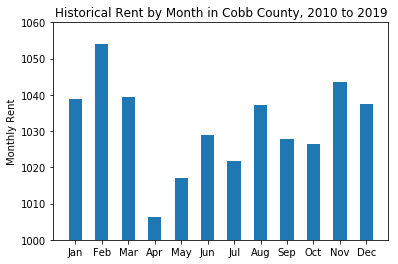

In [181]:
import matplotlib.pyplot as plt
from numpy import arange

fig, ax = plt.subplots()

bar_heights = avg_df['Cobb'].values
bar_positions = arange(12) + .75
ax.bar(bar_positions, bar_heights, 0.5)

tick_pos = arange(12)+0.75

ax.set_ylim(1000, 1060)
ax.set_xticks(tick_pos)
ax.set_xticklabels(months_str)
ax.set_ylabel('Monthly Rent')
ax.set_title('Historical Rent by Month in Cobb County, 2010 to 2019')

plt.show()

April is clearly the best time to rent in Cobb county.  Other good options are May and July.